In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r'alldata_Edmundson.csv') 

df.drop(['Depth_1', 'Trap_Fill%', 'Class1', 'Class2', 'Class3'], axis=1, inplace=True)

In [3]:
## Open and closed ends: [1, 2, 3, 4] indicates (1,2], (2,3], (3,4].

## Trap height bins
th_bins = [0,150,300,1000]
## Overburden bins
ob_bins = [0,1500,3000,10000]
## Trap fill percent bins
tf_bins = [0,50,75,99,100]

## Create columns binning the data into categories
df['TH'] = pd.cut(df['Trap_height'], bins=th_bins, labels=['A','B','C'])
df['OB'] = pd.cut(df['Depth'], bins=ob_bins, labels=['1','2','3'])
df['TF'] = pd.cut(df['Trap_Fill_2%'], bins=tf_bins, labels=['A','B','C','D'])

## Combine the individual categories
df['TH_OB'] = df['TH'].str.cat(df['OB'],sep="")
df['TH_OB_TF'] = df['TH_OB'].str.cat(df['TF'],sep="")

## Copy the category columns
df['th_ob'] = df['TH_OB']
df['th_ob_tf'] = df['TH_OB_TF']
df['th'] = df['TH']

In [4]:
## Sum all the various outcomes to calculate probabilities

## Total rows (ie data points)
outcomes = len(df.index)

## Number of occurrences in each Trap Height bin
nA = len(df[df.TH == 'A'])
nB = len(df[df.TH == 'B'])
nC = len(df[df.TH == 'C'])

## Number of overburden occurrences in each trap height category
nA1 = len(df[df.TH_OB == 'A1'])
nA2 = len(df[df.TH_OB == 'A2'])
nA3 = len(df[df.TH_OB == 'A3'])
nB1 = len(df[df.TH_OB == 'B1'])
nB2 = len(df[df.TH_OB == 'B2'])
nB3 = len(df[df.TH_OB == 'B3'])
nC1 = len(df[df.TH_OB == 'C1'])
nC2 = len(df[df.TH_OB == 'C2'])
nC3 = len(df[df.TH_OB == 'C3'])

## Number of Trap Fill occurrences in each trap-height-overburden categories
nA1A = len(df[df.TH_OB_TF == 'A1A'])
nA1B = len(df[df.TH_OB_TF == 'A1B'])
nA1C = len(df[df.TH_OB_TF == 'A1C'])
nA1D = len(df[df.TH_OB_TF == 'A1D'])

nA2A = len(df[df.TH_OB_TF == 'A2A'])
nA2B = len(df[df.TH_OB_TF == 'A2B'])
nA2C = len(df[df.TH_OB_TF == 'A2C'])
nA2D = len(df[df.TH_OB_TF == 'A2D'])

nA3A = len(df[df.TH_OB_TF == 'A3A'])
nA3B = len(df[df.TH_OB_TF == 'A3B'])
nA3C = len(df[df.TH_OB_TF == 'A3C'])
nA3D = len(df[df.TH_OB_TF == 'A3D'])

nB1A = len(df[df.TH_OB_TF == 'B1A'])
nB1B = len(df[df.TH_OB_TF == 'B1B'])
nB1C = len(df[df.TH_OB_TF == 'B1C'])
nB1D = len(df[df.TH_OB_TF == 'B1D'])

nB2A = len(df[df.TH_OB_TF == 'B2A'])
nB2B = len(df[df.TH_OB_TF == 'B2B'])
nB2C = len(df[df.TH_OB_TF == 'B2C'])
nB2D = len(df[df.TH_OB_TF == 'B2D'])

nB3A = len(df[df.TH_OB_TF == 'B3A'])
nB3B = len(df[df.TH_OB_TF == 'B3B'])
nB3C = len(df[df.TH_OB_TF == 'B3C'])
nB3D = len(df[df.TH_OB_TF == 'B3D'])

nC1A = len(df[df.TH_OB_TF == 'C1A'])
nC1B = len(df[df.TH_OB_TF == 'C1B'])
nC1C = len(df[df.TH_OB_TF == 'C1C'])
nC1D = len(df[df.TH_OB_TF == 'C1D'])

nC2A = len(df[df.TH_OB_TF == 'C2A'])
nC2B = len(df[df.TH_OB_TF == 'C2B'])
nC2C = len(df[df.TH_OB_TF == 'C2C'])
nC2D = len(df[df.TH_OB_TF == 'C2D'])

nC3A = len(df[df.TH_OB_TF == 'C3A'])
nC3B = len(df[df.TH_OB_TF == 'C3B'])
nC3C = len(df[df.TH_OB_TF == 'C3C'])
nC3D = len(df[df.TH_OB_TF == 'C3D'])


#print(pA,pB,pC)
#print(pA1,pA2,pA3,pB1,pB2,pB3,pC1,pC2,pC3)
#print(pA11,pA12,pA13,pA21,pA22,pA23,pA31,pA32,pA33)
#print(pB11,pB12,pB13,pB21,pB22,pB23,pB31,pB32,pB33)
#print(pC11,pC12,pC13,pC21,pC22,pC23,pC31,pC32,pC33)


In [5]:
## changing the column 'TH' (Trap height) to number of entries
x = {'A' : nA,
     'B' : nB,
     'C' : nC
    }

## changing the column 'TH_OB' (Trap height & Overburden) to number of entries
y = {'A1' : nA1,
     'A2' : nA2,
     'A3' : nA3,
     'B1' : nB1,
     'B2' : nB2,
     'B3' : nB3,
     'C1' : nC1,
     'C2' : nC2,
     'C3' : nC3
    }

## changing the column 'TH_OB_TF' (Trap height & Overburden & Trap Fill) to number of entries
z = {'A1A':nA1A, 'A1B':nA1B, 'A1C':nA1C, 'A1D':nA1D,
     'A2A':nA2A, 'A2B':nA2B, 'A2C':nA2C, 'A2D':nA2D,
     'A3A':nA3A, 'A3B':nA3B, 'A3C':nA3C, 'A3D':nA3D,
     'B1A':nB1A, 'B1B':nB1B, 'B1C':nB1C, 'B1D':nB1D,
     'B2A':nB2A, 'B2B':nB2B, 'B2C':nB2C, 'B2D':nB2D,
     'B3A':nB3A, 'B3B':nB3B, 'B3C':nB3C, 'B3D':nB3D,
     'C1A':nC1A, 'C1B':nC1B, 'C1C':nC1C, 'C1D':nC1D,
     'C2A':nC2A, 'C2B':nC2B, 'C2C':nC2C, 'C2D':nC2D,
     'C3A':nC3A, 'C3B':nC3B, 'C3C':nC3C, 'C3D':nC3D
}

In [6]:
## swapping codes for number of occurrances
df.TH = [x[item] for item in df.TH]  
df['pTH'] = df.TH / outcomes

df.TH_OB = [y[item] for item in df.TH_OB]
df['pTH_OB'] = df.TH_OB / df.TH

df.TH_OB_TF = [z[item] for item in df.TH_OB_TF]
df['pTH_OB_TF'] = df.TH_OB_TF / df.TH_OB

## Calculating result probability
df['pTotal'] = df.pTH * df.pTH_OB * df.pTH_OB_TF


In [7]:
## Creating prob dataframe to drop duplicates
prob = df.drop(['Depth', 'HC_Column', 'Trap_height', 'Trap_Fill_2%'], axis=1)
prob.drop_duplicates(inplace=True)

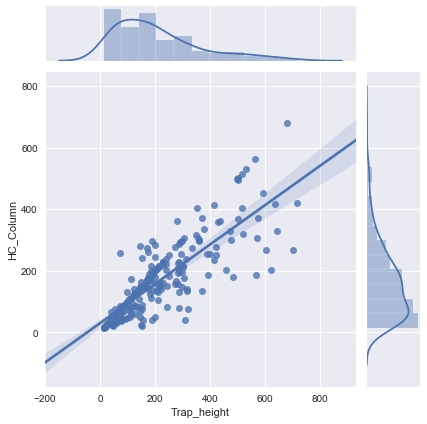

In [8]:
sns.jointplot(y='HC_Column', x='Trap_height', data=df, kind='reg')

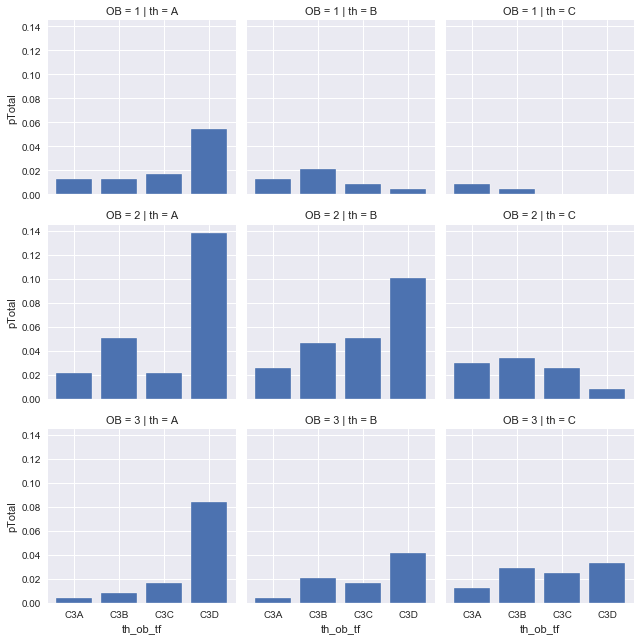

In [9]:
## Plot results : using FacetGrid
g = sns.FacetGrid(data=prob, row='OB' , col='th' )
g.map(plt.bar, 'th_ob_tf', 'pTotal')
plt.savefig('overburden_HCcolumn_by_trapfill_categoryv2',bbox_inches='tight')

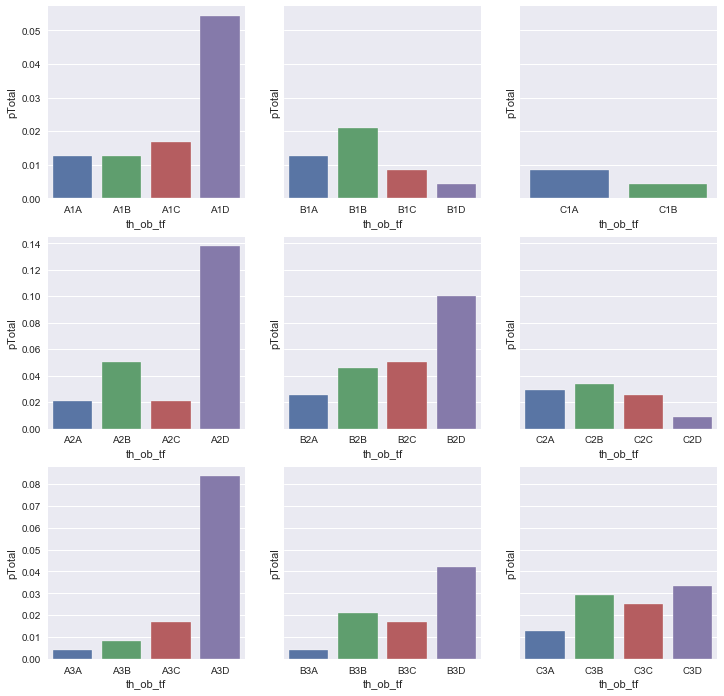

In [10]:
## Plot results using subplots
fig, axes = plt.subplots(3, 3, sharey='row', figsize=(12,12))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='A1'], ax=axes[0,0])
#axes[0,0].set_title('Trap Height (0-150m)')
#axes[0,0].set_ylabel('Probability')
#axes[0].set_xlabel('Trap Fill Percent')
#axes[0].legend()

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='A2'], ax=axes[1,0])
#axes[1].set_title('Trap Height (150-300m)')
#axes[1].set_xlabel('Trap Height (m)')
#axes[1].legend()

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='A3'], ax=axes[2,0])
#axes[0,2].set_title('Trap Height (>300m)')
#axes[2].set_xlabel('Trap Fill (m)')
#axes[2].legend()


sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='B1'], ax=axes[0,1])
#axes[1,0].set_title('Trap Height (0-150m)')
#axes[1,0].set_ylabel('Probability')
#axes[1,0].set_xlabel('Trap Fill Percent')
#axes[1,0].legend()

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='B2'], ax=axes[1,1])
#axes[1,1].set_title('Trap Height (150-300m)')
#axes[1,1].set_xlabel('Trap Height (m)')
#axes[1,1].legend()

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='B3'], ax=axes[2,1])
#axes[5].set_title('Trap Height (>300m)')
#axes[5].set_xlabel('Trap Fill (m)')
#axes[5].legend()


sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='C1'], ax=axes[0,2])
#axes[2,0].set_title('Trap Height (0-150m)')
#axes[2,0].set_ylabel('Probability')
#axes[2,0].set_xlabel('Trap Fill Percent')
#axes[2,0].legend()

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='C2'], ax=axes[1,2])
#axes[2,1].set_title('Trap Height (150-300m)')
#axes[2,1].set_xlabel('Trap Height (m)')
#axes[2,1].legend()

sns.barplot(x='th_ob_tf', y='pTotal', data=prob[prob['th_ob']=='C3'], ax=axes[2,2])
#axes[2,2].set_title('Trap Height (>300m)')
#axes[2,2].set_xlabel('Trap Fill (m)')
#axes[2,2].legend()

plt.savefig('overburden_HCcolumn_by_trapfill_category',bbox_inches='tight')